# Parking Meters in Pittsburgh
*Notebook By Mark Sheffield*

### The purpose of this Notebook is to show where the least number of parking meters would be ###

## The Metric ##
Parking meters are all over the city of Pittsburgh, and if you have a car, the cost to park can add up if you have to constantly pay these fees. The metric within this Notebook will look at the number of parking meters in each neighborhood in order to find where it will make sense to park if you are on a stricter budget in the city.

## Limitations of the Data ##
The limitation of this data is that it does not show the cost of each parking meter, only that there is one at each location. Without the cost to park at each meter I can still analyze the number in the area, finding which neigborhood will give the most opportunites for free parking

## Analyzing the Dataset ##
This dataset includes

Import the necessary resources before starting

In [1]:
import pandas as pd
import geopandas as gpd
import descartes
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

%matplotlib inline

Read in the Parking meters CSV file

In [ ]:
meters = pd.read_csv("https://data.wprdc.org/datastore/dump/9ed126cc-3c06-496e-bd08-b7b6b14b4109")

Filter out any Parking meters that are not active, or have a longitude with value NaN or Latitude with value NaN. Then apply the query mask. 

In [ ]:
query_mask = locations['status'] == "Active"
latitude_mask= locations['latitude'].notna()
longitude_mask = locations['longitude'].notna()

0    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

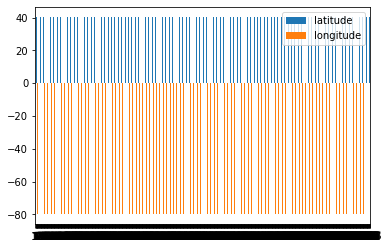

In [2]:
neighborhood = gpd.read_file("Neighborhoods_.shp") #Read in file





locations_active = locations[query_mask & latitude_mask & longitude_mask]
locations_active = locations_active.groupby(by=["zone"].count, axis=0)
locations_active.plot.bar(rot=1)

In [5]:
neighborhood = gpd.read_file("Neighborhoods_.shp") #Read in file

locations = pd.read_csv("https://data.wprdc.org/datastore/dump/9ed126cc-3c06-496e-bd08-b7b6b14b4109")
query_mask = locations['status'] == "Active"
latitude_mask= locations['latitude'].notna()
longitude_mask = locations['longitude'].notna()


locations_active = locations[query_mask & latitude_mask & longitude_mask]
locations_active.head(10)



geometry = [Point(xy) for xy in zip(locations_active['latitude'], locations_active['longitude'])]

locations_df = gpd.GeoDataFrame(locations_active, crs = 'epsg:4326', geometry = geometry)


fig, ax = plt.subplots(figsize=(15,15))

neighborhood.plot(ax=ax, alpha=0.4, color='gray')

locations_df[locations_df['location_type'] == "On street"].plot(ax=ax, markersize=20, color='blue', marker="^", label="On Street")